In [1]:
# Customer Segmentation using K-Means Clustering

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Basic Info
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Rename Columns for clarity
df.rename(columns={
    "Annual Income (k$)": "Annual_Income",
    "Spending Score (1-100)": "Spending_Score"
}, inplace=True)

In [5]:
# Encode Gender
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

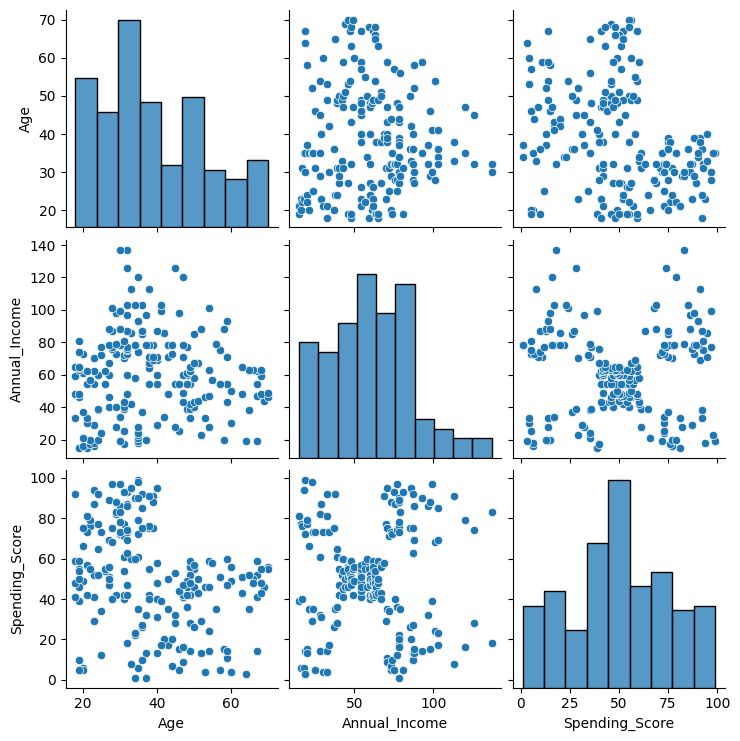

In [6]:
# Distribution Plots
sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score']])
plt.show()

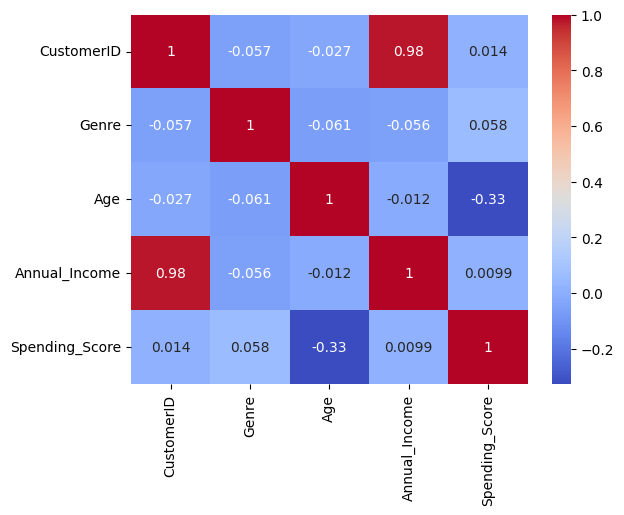

In [7]:
# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
features = ['Age', 'Annual_Income', 'Spending_Score']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Elbow Method
inertia = []
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

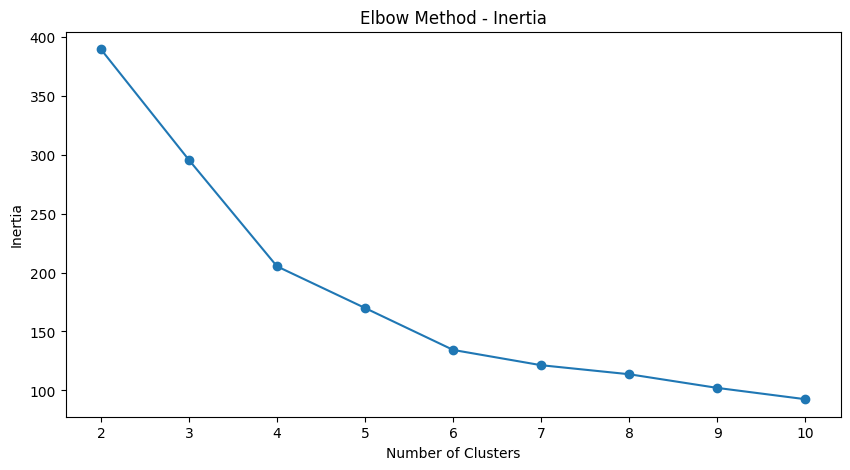

In [10]:
# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method - Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

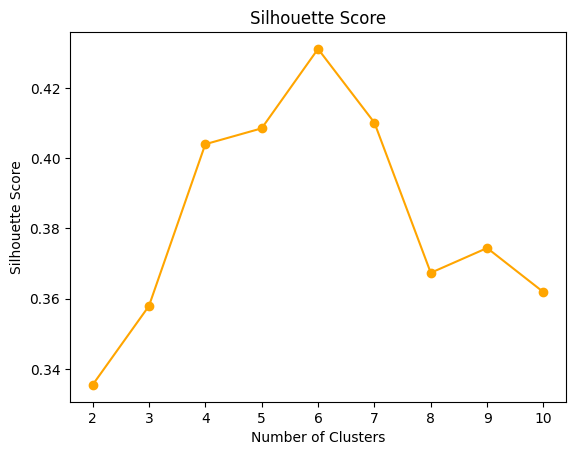

In [11]:
# Plot Silhouette Scores
plt.plot(range(2, 11), sil_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [12]:
# Choose Optimal K (5 based on elbow/silhouette)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [13]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

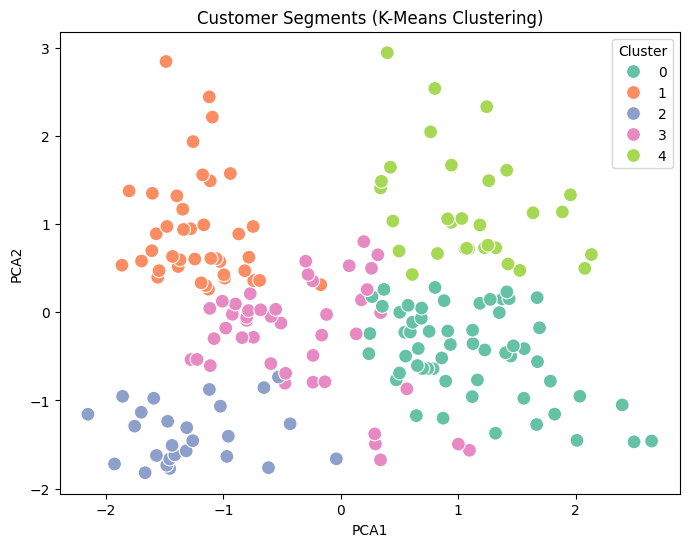

In [14]:
# Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments (K-Means Clustering)")
plt.show()

In [15]:
# Summary Stats per Cluster
cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary['Count'] = df['Cluster'].value_counts()
cluster_summary

,Age,Annual_Income,Spending_Score,Count
Cluster,,,,
0,55.275862,47.620690,41.706897,58
1,32.875000,86.100000,81.525000,40
2,25.769231,26.115385,74.846154,26
3,26.733333,54.311111,40.911111,45
4,44.387097,89.774194,18.483871,31
